In [1]:
!pip install qiskit qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# TASK 1️ : Modify the circuit to have 3 qubits and apply a new gate sequence

# Create a 3-qubit quantum circuit
qc = QuantumCircuit(3)

# Apply a Hadamard gate on qubit 0 to create superposition
qc.h(0)

# Apply CNOT gate with control qubit 0 and target qubit 1 to create entanglement
qc.cx(0, 1)

# Apply a T gate on qubit 2 to introduce a phase shift
qc.t(2)

# Apply another CNOT gate between qubit 1 and qubit 2
qc.cx(1, 2)

# Measure all qubits
qc.measure_all()

# Display the circuit diagram
print("Quantum Circuit:")
print(qc.draw())


Quantum Circuit:
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
        ┌───┐└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ T ├─────┤ X ├─░──╫──╫─┤M├
        └───┘     └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


In [4]:
# TASK 2️ : Generate and display the QASM code for the new circuit

# Convert circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)

# Simulate the circuit using Aer simulator
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()

# Get measurement outcomes
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)



Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
t q[2];
cx q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];


Simulation Result:
{'000': 529, '111': 495}


In [5]:
# TASK 3️ : Identify how Hadamard and CNOT operations are represented in QASM

# Extract lines corresponding to H and CNOT gates from QASM code
print("\nHadamard and CNOT representations in QASM:\n")
for line in qasm_code.splitlines():
    if line.strip().startswith("h ") or line.strip().startswith("cx "):
        print(line)

# Hadamard gate in QASM → h q[0];
# CNOT gate in QASM → cx q[0], q[1];
# These gate names match Qiskit syntax directly and specify which qubits they act upon.


Hadamard and CNOT representations in QASM:

h q[0];
cx q[0], q[1];
cx q[1], q[2];


In [6]:
# TASK 4️: Add a barrier and observe how it appears in the QASM code

# Create a new circuit with the same gates but include a barrier
qc_barrier = QuantumCircuit(3)
qc_barrier.h(0)
qc_barrier.cx(0, 1)
qc_barrier.barrier()      # Barrier added here (prevents gate reordering)
qc_barrier.t(2)
qc_barrier.cx(1, 2)
qc_barrier.measure_all()

# Export the new circuit to OpenQASM 3 format
qasm_with_barrier = qasm3.dumps(qc_barrier)
print("\nOpenQASM 3 Code with Barrier:\n")
print(qasm_with_barrier)

# In QASM, a barrier is represented as:
# barrier q[0], q[1], q[2];
# It acts as a visual and logical separator but does not change quantum state evolution.


OpenQASM 3 Code with Barrier:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1], q[2];
t q[2];
cx q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];




--- Simulation Results Comparison ---
Original Circuit Results:
{'111': 503, '000': 521}

Modified Circuit (with Barrier) Results:
{'111': 514, '000': 510}


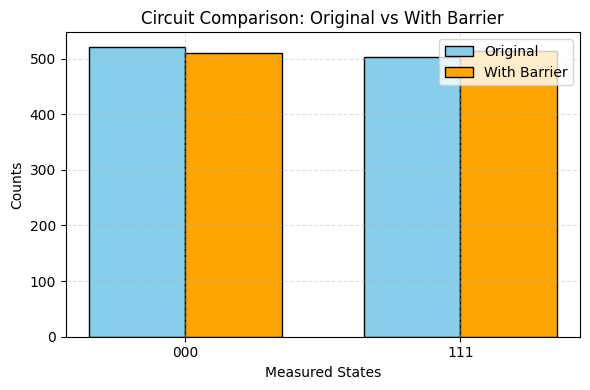

In [10]:
# TASK 5️ : Run the modified circuit and compare simulation results

# Simulate both circuits (original and with barrier)
simulator = AerSimulator()

# Transpile both circuits
compiled_orig = transpile(qc, simulator)
compiled_barrier = transpile(qc_barrier, simulator)

# Run simulations
result_orig = simulator.run(compiled_orig, shots=1024).result()
result_barrier = simulator.run(compiled_barrier, shots=1024).result()

# Get counts
counts_orig = result_orig.get_counts()
counts_barrier = result_barrier.get_counts()

# Print the results
print("\n--- Simulation Results Comparison ---")
print("Original Circuit Results:")
print(counts_orig)
print("\nModified Circuit (with Barrier) Results:")
print(counts_barrier)

import numpy as np

# Collect all possible states (keys)
states = sorted(set(list(counts_orig.keys()) + list(counts_barrier.keys())))

# Extract frequencies for both circuits
orig_freq = [counts_orig.get(s, 0) for s in states]
barrier_freq = [counts_barrier.get(s, 0) for s in states]

# Create bar chart
x = np.arange(len(states))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, orig_freq, width, label='Original', color='skyblue', edgecolor='black')
plt.bar(x + width/2, barrier_freq, width, label='With Barrier', color='orange', edgecolor='black')

# Labels and title
plt.xticks(x, states)
plt.xlabel("Measured States")
plt.ylabel("Counts")
plt.title("Circuit Comparison: Original vs With Barrier")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# The histogram shows nearly identical results for both circuits.
# The barrier does not affect the quantum behavior — it only prevents gate reordering.
